In [1]:
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from Image_Functions import slicing,  crop_to_size
from datasetModule import Set
from torch import nn
from Dice_Loss import DiceLoss
import Model_Aske
from Model import CNN
from ExtraCrossEntropy import ExtraCrossEntropy
from matplotlib import pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


Most of the functionallity is stored in module files. 
The data consist of Images with 3 channels and segmentation images with 2 channels.


In [2]:
#hyper parameters
batch_size = 2
learning_rate = 0.01
num_epochs = 4

In [3]:
"Need to specify the local path on computer"
dir_path = "../Cropped_Task3/"

'Splitting the data into 30% test and 70% training.'
train_set, test_set = train_test_split(Set(dir_path, sub_dir = 'crop_sub-23'), test_size=0.3, random_state=25)

#X_train, X_test = crop_images_to_brain(X_train), crop_images_to_brain(X_test)
size = (256,288,176)
train_set = crop_to_size(train_set, size)
test_set = crop_to_size(test_set, size)

'Load training and test set, batch size my vary'
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)
test_set = None
train_set = None

../Cropped_Task3/crop_sub-233
seperate z, order in z is 3 order inplane is 2


/Users/okm/miniconda3/lib/python3.9/site-packages/skimage/transform/_warps.py:176: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  out = warp(image, tform, output_shape=output_shape, order=order,


seperate z, order in z is 3 order inplane is 2


KeyboardInterrupt: 

In [4]:
'Run the CNN'
model = CNN(3,base_features=16).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
n_total_steps = len(train_loader)




In [ ]:
""" examples = iter(train_loader)
samples = examples.next()

try:
    while (samples['seg'][0][0].max() == 0) or (samples['seg'][0][0].max() == 0):
        samples = examples.next()
except StopIteration:
    print('Iteration is shit')
data = samples['data']
seg = samples['seg']

print(seg.max())
print(seg.shape)
print(data.shape)
out = model(data) """



In [ ]:
""" img_1 = out[0][0]
img_2 = data[0][0]
print(img_1.shape)
print(img_2.shape)
img_1 = img_1.detach().numpy()
img_2 = img_2.detach().numpy()
slicing(img_1)
slicing(img_2) """

In [ ]:

""" loss_func_1 = nn.BCELoss()
loss_func_2 = DiceLoss()
loss_func_3 = ExtraCrossEntropy()
#target = torch.squeeze(seg, 0).type(torch.LongTensor)
#target = seg.resize_(1,256,288,176).type(torch.LongTensor)
seg = seg.float()
sigmoid = nn.Sigmoid()
out_sig = sigmoid(out)
out_sig_2 = out_sig.detach()
loss_1 = loss_func_1(out_sig, out_sig_2)
print(loss_1)
loss_2 = loss_func_2(out, out)
print(loss_2)
loss_3 = loss_func_3(out, seg)
print(loss_3) """

Notes on how things are going: 


BCELoss requires no squeezing, where as Cross Entropy requires the feature dimension to be squeezed

In [5]:
loss_func_2 = DiceLoss()


In [6]:
losses = []
for epoch in range(2):
    for i, image_set in enumerate(train_loader):
        image = image_set['data'].to(device)
        labels = image_set['seg'].to(device)
        optimizer.zero_grad()
        outputs = model(image)
        print("outputs shape = ", outputs.shape)
        print("labels shape = ", labels.shape)
        loss = loss_func_2(outputs, labels)
        print(loss.item())
        losses.append(loss.item())
        print(2)
        loss.backward()
        print(3)
        optimizer.step()
        print(4)
        if (i+1) % 1 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

Layer 1: torch.Size([2, 32, 256, 288, 176])
torch.Size([2, 32, 128, 144, 88])


[0.9997078047218897, 0.9999994726012735, 0.9999997044283578, 0.9999994219767614]


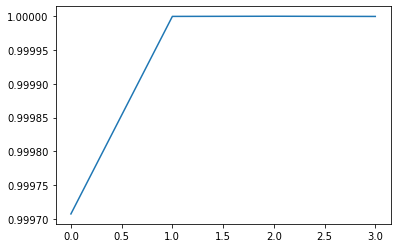

In [12]:
plt.plot(losses)
print(losses)

In [1]:
!jupyter nbconvert --to script *.ipynb

[NbConvertApp] Converting notebook notebook.ipynb to script
[NbConvertApp] Writing 1664 bytes to notebook.py
[NbConvertApp] Converting notebook notebook_aske.ipynb to script
[NbConvertApp] Writing 3668 bytes to notebook_aske.py
[NbConvertApp] Converting notebook testing.ipynb to script
Traceback (most recent call last):
  File "/Users/okm/miniconda3/lib/python3.9/site-packages/nbformat/reader.py", line 14, in parse_json
    nb_dict = json.loads(s, **kwargs)
  File "/Users/okm/miniconda3/lib/python3.9/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/Users/okm/miniconda3/lib/python3.9/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Users/okm/miniconda3/lib/python3.9/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

The above exception was the direct cause of the follow